# Red Neuronal Convolucional: Chihuahua o muffin
Se construirá una red neuronal convolucional que identificará si la imagen dada es un chihuahua o un muffin  
Se usó el siguiente [dataset](https://drive.google.com/open?id=1PLPNu73zZZNXaxv_4S51P4Ris9FvUs4F)


## Parte 1: Construyendo la RNC
### Importar librerias y paquetes de keras

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


### Constantes

In [2]:
img_size = 150

### Construyendo la red neuronal convolucional

In [3]:
def build_cnn():
    classifier = Sequential()
    
    # Primera convolucion
    classifier.add(Convolution2D(
        32,                                     # n filtros
        (3, 3),                                 # filtros de 3x3
        input_shape = (img_size, img_size, 3),  # entrada imagenes rgb 150x150
        activation = 'relu'                     # no-lineal
    ))
    # Pooling de la primera convolucion
    classifier.add(MaxPooling2D((2,2))) # stride por default es pool_size
    
    # Segunda convolucion
    classifier.add(Convolution2D(
        64,                                     # n filtros
        (3, 3),                                 # filtros de 3x3
        activation = 'relu'                     # no-lineal
    ))
    # Pooling de la primera convolucion
    classifier.add(MaxPooling2D((2,2))) # stride por default es pool_size
    
    # Flattening
    classifier.add(Flatten()) # keras sabe que pedo
    
    # Full-conection
    # Primera Capa oculta
    classifier.add(Dense(
        units = 64,         # numero de neuronas
        activation = "relu"
    ))
    classifier.add(Dropout(0.3)) # Solo usa el 30% de las neuronas de la capa anterior en el entrenamiento
    # Segunda Capa oculta
    classifier.add(Dense(
        units = 64,         # numero de neuronas
        activation = "relu"
    ))
    # Capa de salida
    classifier.add(Dense(
        units = 2,             # chihuahua o muffin
        activation = 'softmax'
    ))
    
    # Compila
    classifier.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return classifier

## Parte 2: Alimentando la RNC con imagenes

Found 1568 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
[learning_curve] Training set sizes: [ 198  644 1091 1537 1984]
[CV]  ................................................................
Epoch 1/20
198/198 [==============================] - 7s - loss: 1.5121 - acc: 0.5303     
Epoch 2/20
198/198 [==============================] - 5s - loss: 0.6569 - acc: 0.5556     
Epoch 3/20
198/198 [==============================] - 5s - loss: 0.6205 - acc: 0.6768     
Epoch 4/20
198/198 [==============================] - 5s - loss: 0.4729 - acc: 0.7778     
Epoch 5/20
198/198 [==============================] - 5s - loss: 0.3924 - acc: 0.8283     
Epoch 6/20
198/198 [==============================] - 5s - loss: 0.2661 - acc: 0.8939     
Epoch 7/20
198/198 [==============================] - 5s - loss: 0.1676 - acc: 0.9495     
Epoch 8/20
198/198 [==============================] - 5s - loss: 0.1298 - acc: 0.9646     
Epoch 9/20
198/198 [==============================] - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


Epoch 1/20
644/644 [==============================] - 18s - loss: 0.7232 - acc: 0.6273    
Epoch 2/20
644/644 [==============================] - 18s - loss: 0.5476 - acc: 0.7562    
Epoch 3/20
644/644 [==============================] - 19s - loss: 0.4920 - acc: 0.7888    
Epoch 4/20
644/644 [==============================] - 19s - loss: 0.4440 - acc: 0.8090    
Epoch 5/20
644/644 [==============================] - 20s - loss: 0.3564 - acc: 0.8618    
Epoch 6/20
644/644 [==============================] - 20s - loss: 0.3163 - acc: 0.8804    
Epoch 7/20
644/644 [==============================] - 20s - loss: 0.1996 - acc: 0.9255    
Epoch 8/20
644/644 [==============================] - 20s - loss: 0.1231 - acc: 0.9565    
Epoch 9/20
644/644 [==============================] - 21s - loss: 0.1246 - acc: 0.9503    
Epoch 10/20
644/644 [==============================] - 21s - loss: 0.0775 - acc: 0.9720    
Epoch 11/20
644/644 [==============================] - 21s - loss: 0.0493 - acc: 0.9860  

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.2min remaining:    0.0s


Epoch 1/20
1091/1091 [==============================] - 36s - loss: 0.7349 - acc: 0.5472    
Epoch 2/20
1091/1091 [==============================] - 36s - loss: 0.5772 - acc: 0.7058    
Epoch 3/20
1091/1091 [==============================] - 36s - loss: 0.4825 - acc: 0.8011    
Epoch 4/20
1091/1091 [==============================] - 36s - loss: 0.3721 - acc: 0.8359    
Epoch 5/20
1091/1091 [==============================] - 37s - loss: 0.2566 - acc: 0.8983    
Epoch 6/20
1091/1091 [==============================] - 36s - loss: 0.1823 - acc: 0.9285    
Epoch 7/20
1091/1091 [==============================] - 36s - loss: 0.1197 - acc: 0.9606    
Epoch 8/20
1091/1091 [==============================] - 36s - loss: 0.1120 - acc: 0.9643    
Epoch 9/20
1091/1091 [==============================] - 36s - loss: 0.0619 - acc: 0.9826    
Epoch 10/20
1091/1091 [==============================] - 36s - loss: 0.0612 - acc: 0.9853    
Epoch 11/20
1091/1091 [==============================] - 36s - loss: 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 21.7min remaining:    0.0s


Epoch 1/20
1537/1537 [==============================] - 51s - loss: 0.6656 - acc: 0.6766    
Epoch 2/20
1537/1537 [==============================] - 51s - loss: 0.4743 - acc: 0.7781    
Epoch 3/20
1537/1537 [==============================] - 51s - loss: 0.4094 - acc: 0.8178    
Epoch 4/20
1537/1537 [==============================] - 50s - loss: 0.3913 - acc: 0.8380    
Epoch 5/20
1537/1537 [==============================] - 51s - loss: 0.2690 - acc: 0.8939    
Epoch 6/20
1537/1537 [==============================] - 51s - loss: 0.2431 - acc: 0.9109    
Epoch 7/20
1537/1537 [==============================] - 51s - loss: 0.1553 - acc: 0.9453    
Epoch 8/20
1537/1537 [==============================] - 50s - loss: 0.0957 - acc: 0.9720    
Epoch 9/20
1537/1537 [==============================] - 51s - loss: 0.1065 - acc: 0.9584    
Epoch 10/20
1537/1537 [==============================] - 51s - loss: 0.0810 - acc: 0.9772    
Epoch 11/20
1537/1537 [==============================] - 51s - loss: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 39.0min remaining:    0.0s


Epoch 1/20
1984/1984 [==============================] - 65s - loss: 0.5689 - acc: 0.7132    
Epoch 2/20
1984/1984 [==============================] - 65s - loss: 0.4535 - acc: 0.8019    
Epoch 3/20
1984/1984 [==============================] - 65s - loss: 0.3462 - acc: 0.8508    
Epoch 4/20
1984/1984 [==============================] - 65s - loss: 0.2697 - acc: 0.8866    
Epoch 5/20
1984/1984 [==============================] - 65s - loss: 0.2084 - acc: 0.9163    
Epoch 6/20
1984/1984 [==============================] - 65s - loss: 0.1348 - acc: 0.9551    
Epoch 7/20
1984/1984 [==============================] - 66s - loss: 0.1212 - acc: 0.9582    
Epoch 8/20
1984/1984 [==============================] - 66s - loss: 0.0738 - acc: 0.9738    
Epoch 9/20
1984/1984 [==============================] - 67s - loss: 0.0556 - acc: 0.9783    
Epoch 10/20
1984/1984 [==============================] - 65s - loss: 0.0638 - acc: 0.9793    
Epoch 11/20
1984/1984 [==============================] - 65s - loss: 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 61.7min remaining:    0.0s


Epoch 1/20
198/198 [==============================] - 7s - loss: 0.9721 - acc: 0.5354     
Epoch 2/20
198/198 [==============================] - 6s - loss: 0.6679 - acc: 0.5657     
Epoch 3/20
198/198 [==============================] - 6s - loss: 0.6125 - acc: 0.6970     
Epoch 4/20
198/198 [==============================] - 6s - loss: 0.5245 - acc: 0.8030     
Epoch 5/20
198/198 [==============================] - 6s - loss: 0.4225 - acc: 0.8485     
Epoch 6/20
198/198 [==============================] - 7s - loss: 0.3000 - acc: 0.8687     
Epoch 7/20
198/198 [==============================] - 6s - loss: 0.1805 - acc: 0.9444     
Epoch 8/20
198/198 [==============================] - 7s - loss: 0.1374 - acc: 0.9545     
Epoch 9/20
198/198 [==============================] - 6s - loss: 0.1518 - acc: 0.9444     
Epoch 10/20
198/198 [==============================] - 7s - loss: 0.0929 - acc: 0.9848     
Epoch 11/20
198/198 [==============================] - 6s - loss: 0.0423 - acc: 0.9949   

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 64.1min remaining:    0.0s


Epoch 1/20
644/644 [==============================] - 22s - loss: 0.6555 - acc: 0.6211    
Epoch 2/20
644/644 [==============================] - 22s - loss: 0.5098 - acc: 0.7748    
Epoch 3/20
644/644 [==============================] - 22s - loss: 0.4464 - acc: 0.7981    
Epoch 4/20
644/644 [==============================] - 22s - loss: 0.3538 - acc: 0.8385    
Epoch 5/20
644/644 [==============================] - 22s - loss: 0.2378 - acc: 0.9053    
Epoch 6/20
644/644 [==============================] - 22s - loss: 0.1567 - acc: 0.9410    
Epoch 7/20
644/644 [==============================] - 22s - loss: 0.1344 - acc: 0.9519    
Epoch 8/20
644/644 [==============================] - 22s - loss: 0.0729 - acc: 0.9736    
Epoch 9/20
644/644 [==============================] - 22s - loss: 0.0620 - acc: 0.9829    
Epoch 10/20
644/644 [==============================] - 22s - loss: 0.0443 - acc: 0.9876    
Epoch 11/20
644/644 [==============================] - 22s - loss: 0.0353 - acc: 0.9907  

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 71.7min remaining:    0.0s


Epoch 1/20
1091/1091 [==============================] - 37s - loss: 0.7488 - acc: 0.5830    
Epoch 2/20
1091/1091 [==============================] - 36s - loss: 0.5683 - acc: 0.7434    
Epoch 3/20
1091/1091 [==============================] - 37s - loss: 0.4791 - acc: 0.7754    
Epoch 4/20
1091/1091 [==============================] - 37s - loss: 0.3719 - acc: 0.8396    
Epoch 5/20
1091/1091 [==============================] - 36s - loss: 0.2537 - acc: 0.9019    
Epoch 6/20
1091/1091 [==============================] - 37s - loss: 0.1682 - acc: 0.9368    
Epoch 7/20
1091/1091 [==============================] - 37s - loss: 0.1223 - acc: 0.9505    
Epoch 8/20
1091/1091 [==============================] - 36s - loss: 0.1170 - acc: 0.9569    
Epoch 9/20
1091/1091 [==============================] - 37s - loss: 0.0610 - acc: 0.9808    
Epoch 10/20
1091/1091 [==============================] - 37s - loss: 0.0622 - acc: 0.9789    
Epoch 11/20
1091/1091 [==============================] - 36s - loss: 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 84.2min remaining:    0.0s


Epoch 1/20
1537/1537 [==============================] - 52s - loss: 0.6191 - acc: 0.6864    
Epoch 2/20
1537/1537 [==============================] - 51s - loss: 0.4555 - acc: 0.8016    
Epoch 3/20
1537/1537 [==============================] - 51s - loss: 0.4254 - acc: 0.8139    
Epoch 4/20
1537/1537 [==============================] - 52s - loss: 0.3466 - acc: 0.8562    
Epoch 5/20
1537/1537 [==============================] - 52s - loss: 0.2418 - acc: 0.9011    
Epoch 6/20
1537/1537 [==============================] - 51s - loss: 0.1886 - acc: 0.9310    
Epoch 7/20
1537/1537 [==============================] - 51s - loss: 0.1464 - acc: 0.9506    
Epoch 8/20
1537/1537 [==============================] - 51s - loss: 0.1270 - acc: 0.9629    
Epoch 9/20
1537/1537 [==============================] - 52s - loss: 0.0733 - acc: 0.9720    
Epoch 10/20
1537/1537 [==============================] - 51s - loss: 0.0668 - acc: 0.9733    
Epoch 11/20
1537/1537 [==============================] - 52s - loss: 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 101.9min remaining:    0.0s


Epoch 1/20
1984/1984 [==============================] - 66s - loss: 0.5881 - acc: 0.7061    
Epoch 2/20
1984/1984 [==============================] - 67s - loss: 0.4730 - acc: 0.7853    
Epoch 3/20
1984/1984 [==============================] - 67s - loss: 0.3947 - acc: 0.8301    
Epoch 4/20
1984/1984 [==============================] - 66s - loss: 0.3379 - acc: 0.8589    
Epoch 5/20
1984/1984 [==============================] - 66s - loss: 0.2481 - acc: 0.8977    
Epoch 6/20
1984/1984 [==============================] - 66s - loss: 0.1575 - acc: 0.9461    
Epoch 7/20
1984/1984 [==============================] - 67s - loss: 0.1039 - acc: 0.9597    
Epoch 8/20
1984/1984 [==============================] - 66s - loss: 0.1113 - acc: 0.9572    
Epoch 9/20
1984/1984 [==============================] - 66s - loss: 0.0610 - acc: 0.9773    
Epoch 10/20
1984/1984 [==============================] - 67s - loss: 0.0483 - acc: 0.9798    
Epoch 11/20
1984/1984 [==============================] - 66s - loss: 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 124.5min remaining:    0.0s


Epoch 1/20
198/198 [==============================] - 6s - loss: 0.9743 - acc: 0.5404     
Epoch 2/20
198/198 [==============================] - 6s - loss: 0.6969 - acc: 0.5505     
Epoch 3/20
198/198 [==============================] - 6s - loss: 0.6164 - acc: 0.6667     
Epoch 4/20
198/198 [==============================] - 6s - loss: 0.6796 - acc: 0.6768     
Epoch 5/20
198/198 [==============================] - 6s - loss: 0.5335 - acc: 0.8283     
Epoch 6/20
198/198 [==============================] - 6s - loss: 0.4114 - acc: 0.8636     
Epoch 7/20
198/198 [==============================] - 7s - loss: 0.2823 - acc: 0.8838     
Epoch 8/20
198/198 [==============================] - 7s - loss: 0.1899 - acc: 0.9141     
Epoch 9/20
198/198 [==============================] - 7s - loss: 0.1137 - acc: 0.9646     
Epoch 10/20
198/198 [==============================] - 6s - loss: 0.0771 - acc: 0.9747     
Epoch 11/20
198/198 [==============================] - 7s - loss: 0.0549 - acc: 0.9798   

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 126.9min remaining:    0.0s


Epoch 1/20
644/644 [==============================] - 22s - loss: 0.8081 - acc: 0.5901    
Epoch 2/20
644/644 [==============================] - 22s - loss: 0.4950 - acc: 0.7733    
Epoch 3/20
644/644 [==============================] - 22s - loss: 0.4321 - acc: 0.8059    
Epoch 4/20
644/644 [==============================] - 22s - loss: 0.3295 - acc: 0.8618    
Epoch 5/20
644/644 [==============================] - 22s - loss: 0.2195 - acc: 0.9208    
Epoch 6/20
644/644 [==============================] - 22s - loss: 0.1385 - acc: 0.9581    
Epoch 7/20
644/644 [==============================] - 22s - loss: 0.1165 - acc: 0.9627    
Epoch 8/20
644/644 [==============================] - 22s - loss: 0.1144 - acc: 0.9627    
Epoch 9/20
644/644 [==============================] - 22s - loss: 0.0591 - acc: 0.9891    
Epoch 10/20
644/644 [==============================] - 22s - loss: 0.0467 - acc: 0.9860    
Epoch 11/20
644/644 [==============================] - 22s - loss: 0.0147 - acc: 0.9953  

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 134.5min remaining:    0.0s


Epoch 1/20
1091/1091 [==============================] - 37s - loss: 0.7000 - acc: 0.6370    
Epoch 2/20
1091/1091 [==============================] - 37s - loss: 0.5264 - acc: 0.7424    
Epoch 3/20
1091/1091 [==============================] - 37s - loss: 0.4314 - acc: 0.7947    
Epoch 4/20
1091/1091 [==============================] - 37s - loss: 0.4105 - acc: 0.8158    
Epoch 5/20
1091/1091 [==============================] - 37s - loss: 0.3025 - acc: 0.8799    
Epoch 6/20
1091/1091 [==============================] - 37s - loss: 0.2061 - acc: 0.9212    
Epoch 7/20
1091/1091 [==============================] - 37s - loss: 0.1575 - acc: 0.9432    
Epoch 8/20
1091/1091 [==============================] - 37s - loss: 0.0862 - acc: 0.9725    
Epoch 9/20
1091/1091 [==============================] - 37s - loss: 0.0815 - acc: 0.9698    
Epoch 10/20
1091/1091 [==============================] - 37s - loss: 0.1100 - acc: 0.9615    
Epoch 11/20
1091/1091 [==============================] - 37s - loss: 

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 147.3min remaining:    0.0s


Epoch 1/20
1537/1537 [==============================] - 52s - loss: 0.5872 - acc: 0.6949    
Epoch 2/20
1537/1537 [==============================] - 52s - loss: 0.4530 - acc: 0.8016    
Epoch 3/20
1537/1537 [==============================] - 51s - loss: 0.3813 - acc: 0.8399    
Epoch 4/20
1537/1537 [==============================] - 51s - loss: 0.3096 - acc: 0.8731    
Epoch 5/20
1537/1537 [==============================] - 51s - loss: 0.2325 - acc: 0.9070    
Epoch 6/20
1537/1537 [==============================] - 52s - loss: 0.1328 - acc: 0.9519    
Epoch 7/20
1537/1537 [==============================] - 51s - loss: 0.1179 - acc: 0.9649    
Epoch 8/20
1537/1537 [==============================] - 52s - loss: 0.0571 - acc: 0.9785    
Epoch 9/20
1537/1537 [==============================] - 51s - loss: 0.0751 - acc: 0.9727    
Epoch 10/20
1537/1537 [==============================] - 52s - loss: 0.0831 - acc: 0.9662    
Epoch 11/20
1537/1537 [==============================] - 51s - loss: 

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 164.9min remaining:    0.0s


Epoch 1/20
1984/1984 [==============================] - 66s - loss: 0.5875 - acc: 0.6920    
Epoch 2/20
1984/1984 [==============================] - 66s - loss: 0.4168 - acc: 0.8145    
Epoch 3/20
1984/1984 [==============================] - 65s - loss: 0.4088 - acc: 0.8286    
Epoch 4/20
1984/1984 [==============================] - 65s - loss: 0.3159 - acc: 0.8684    
Epoch 5/20
1984/1984 [==============================] - 65s - loss: 0.2046 - acc: 0.9143    
Epoch 6/20
1984/1984 [==============================] - 66s - loss: 0.1352 - acc: 0.9501    
Epoch 7/20
1984/1984 [==============================] - 66s - loss: 0.1003 - acc: 0.9662    
Epoch 8/20
1984/1984 [==============================] - 66s - loss: 0.0645 - acc: 0.9763    
Epoch 9/20
1984/1984 [==============================] - 66s - loss: 0.0653 - acc: 0.9783    
Epoch 10/20
1984/1984 [==============================] - 66s - loss: 0.0425 - acc: 0.9874    
Epoch 11/20
1984/1984 [==============================] - 66s - loss: 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 187.5min remaining:    0.0s


Epoch 1/20
198/198 [==============================] - 6s - loss: 1.0016 - acc: 0.4646     
Epoch 2/20
198/198 [==============================] - 6s - loss: 0.6822 - acc: 0.5909     
Epoch 3/20
198/198 [==============================] - 6s - loss: 0.6505 - acc: 0.6465     
Epoch 4/20
198/198 [==============================] - 6s - loss: 0.5602 - acc: 0.7323     
Epoch 5/20
198/198 [==============================] - 6s - loss: 0.4605 - acc: 0.8434     
Epoch 6/20
198/198 [==============================] - 6s - loss: 0.3808 - acc: 0.8535     
Epoch 7/20
198/198 [==============================] - 7s - loss: 0.2747 - acc: 0.9242     
Epoch 8/20
198/198 [==============================] - 6s - loss: 0.1275 - acc: 0.9848     
Epoch 9/20
198/198 [==============================] - 7s - loss: 0.0944 - acc: 0.9697     
Epoch 10/20
198/198 [==============================] - 6s - loss: 0.0841 - acc: 0.9899     
Epoch 11/20
198/198 [==============================] - 7s - loss: 0.0358 - acc: 0.9899   

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 189.9min remaining:    0.0s


Epoch 1/20
644/644 [==============================] - 22s - loss: 0.6766 - acc: 0.6258    
Epoch 2/20
644/644 [==============================] - 22s - loss: 0.4901 - acc: 0.7966    
Epoch 3/20
644/644 [==============================] - 21s - loss: 0.4203 - acc: 0.8183    
Epoch 4/20
644/644 [==============================] - 22s - loss: 0.3313 - acc: 0.8680    
Epoch 5/20
644/644 [==============================] - 22s - loss: 0.1932 - acc: 0.9317    
Epoch 6/20
644/644 [==============================] - 21s - loss: 0.1218 - acc: 0.9550    
Epoch 7/20
644/644 [==============================] - 22s - loss: 0.0755 - acc: 0.9752    
Epoch 8/20
644/644 [==============================] - 22s - loss: 0.0392 - acc: 0.9907    
Epoch 9/20
644/644 [==============================] - 22s - loss: 0.0501 - acc: 0.9829    
Epoch 10/20
644/644 [==============================] - 22s - loss: 0.0226 - acc: 0.9922    
Epoch 11/20
644/644 [==============================] - 22s - loss: 0.0124 - acc: 1.0000  

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 197.4min remaining:    0.0s


Epoch 1/20
1091/1091 [==============================] - 37s - loss: 0.6212 - acc: 0.6994    
Epoch 2/20
1091/1091 [==============================] - 36s - loss: 0.4617 - acc: 0.7846    
Epoch 3/20
1091/1091 [==============================] - 36s - loss: 0.3995 - acc: 0.8213    
Epoch 4/20
1091/1091 [==============================] - 36s - loss: 0.2868 - acc: 0.8799    
Epoch 5/20
1091/1091 [==============================] - 36s - loss: 0.2211 - acc: 0.9157    
Epoch 6/20
1091/1091 [==============================] - 36s - loss: 0.1197 - acc: 0.9542    
Epoch 7/20
1091/1091 [==============================] - 36s - loss: 0.1409 - acc: 0.9441    
Epoch 8/20
1091/1091 [==============================] - 36s - loss: 0.0996 - acc: 0.9624    
Epoch 9/20
1091/1091 [==============================] - 36s - loss: 0.0507 - acc: 0.9890    
Epoch 10/20
1091/1091 [==============================] - 36s - loss: 0.0470 - acc: 0.9835    
Epoch 11/20
1091/1091 [==============================] - 36s - loss: 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 209.9min remaining:    0.0s


Epoch 1/20
1537/1537 [==============================] - 51s - loss: 0.6816 - acc: 0.6181    
Epoch 2/20
1537/1537 [==============================] - 51s - loss: 0.5384 - acc: 0.7430    
Epoch 3/20
1537/1537 [==============================] - 51s - loss: 0.4768 - acc: 0.7885    
Epoch 4/20
1537/1537 [==============================] - 51s - loss: 0.3321 - acc: 0.8569    
Epoch 5/20
1537/1537 [==============================] - 51s - loss: 0.2570 - acc: 0.8939    
Epoch 6/20
1537/1537 [==============================] - 51s - loss: 0.1730 - acc: 0.9323    
Epoch 7/20
1537/1537 [==============================] - 51s - loss: 0.1454 - acc: 0.9434    
Epoch 8/20
1537/1537 [==============================] - 51s - loss: 0.0760 - acc: 0.9707    
Epoch 9/20
1537/1537 [==============================] - 51s - loss: 0.0821 - acc: 0.9668    
Epoch 10/20
1537/1537 [==============================] - 51s - loss: 0.0355 - acc: 0.9883    
Epoch 11/20
1537/1537 [==============================] - 51s - loss: 

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 227.4min remaining:    0.0s


Epoch 1/20
1984/1984 [==============================] - 65s - loss: 0.5529 - acc: 0.7404    
Epoch 2/20
1984/1984 [==============================] - 65s - loss: 0.4444 - acc: 0.8019    
Epoch 3/20
1984/1984 [==============================] - 65s - loss: 0.3868 - acc: 0.8296    
Epoch 4/20
1984/1984 [==============================] - 65s - loss: 0.3448 - acc: 0.8553    
Epoch 5/20
1984/1984 [==============================] - 65s - loss: 0.2578 - acc: 0.8886    
Epoch 6/20
1984/1984 [==============================] - 66s - loss: 0.1547 - acc: 0.9400    
Epoch 7/20
1984/1984 [==============================] - 65s - loss: 0.1234 - acc: 0.9572    
Epoch 8/20
1984/1984 [==============================] - 65s - loss: 0.0829 - acc: 0.9713    
Epoch 9/20
1984/1984 [==============================] - 65s - loss: 0.0621 - acc: 0.9793    
Epoch 10/20
1984/1984 [==============================] - 65s - loss: 0.0482 - acc: 0.9849    
Epoch 11/20
1984/1984 [==============================] - 65s - loss: 

1088/1091 [============================>.] - ETA: 0s[CV] ....................... , score=0.7873303175511943, total=12.3min
[CV]  ................................................................
Epoch 1/20
1537/1537 [==============================] - 51s - loss: 0.6843 - acc: 0.6383    
Epoch 2/20
1537/1537 [==============================] - 51s - loss: 0.5313 - acc: 0.7567    
Epoch 3/20
1537/1537 [==============================] - 51s - loss: 0.4302 - acc: 0.8172    
Epoch 4/20
1537/1537 [==============================] - 51s - loss: 0.3363 - acc: 0.8556    
Epoch 5/20
1537/1537 [==============================] - 51s - loss: 0.2875 - acc: 0.8874    
Epoch 6/20
1537/1537 [==============================] - 51s - loss: 0.2186 - acc: 0.9232    
Epoch 7/20
1537/1537 [==============================] - 51s - loss: 0.1393 - acc: 0.9493    
Epoch 8/20
1537/1537 [==============================] - 51s - loss: 0.1125 - acc: 0.9681    
Epoch 9/20
1537/1537 [==============================] - 51s - 

644/644 [==============================] - 22s - loss: 0.0178 - acc: 0.9938    
Epoch 20/20
644/644 [==============================] - 6s     
[CV] ....................... , score=0.7454545443708246, total= 7.5min
[CV]  ................................................................
Epoch 1/20
1091/1091 [==============================] - 37s - loss: 0.6478 - acc: 0.6425    
Epoch 2/20
1091/1091 [==============================] - 36s - loss: 0.5037 - acc: 0.7773    
Epoch 3/20
1091/1091 [==============================] - 37s - loss: 0.3905 - acc: 0.8396    
Epoch 4/20
1091/1091 [==============================] - 36s - loss: 0.2723 - acc: 0.8891    
Epoch 5/20
1091/1091 [==============================] - 36s - loss: 0.2048 - acc: 0.9276    
Epoch 6/20
1091/1091 [==============================] - 36s - loss: 0.1103 - acc: 0.9670    
Epoch 7/20
1091/1091 [==============================] - 36s - loss: 0.1193 - acc: 0.9624    
Epoch 8/20
1091/1091 [==============================] - 36s - lo

198/198 [==============================] - 6s - loss: 0.0980 - acc: 0.9697     
Epoch 17/20
198/198 [==============================] - 6s - loss: 0.0961 - acc: 0.9949     
Epoch 18/20
198/198 [==============================] - 6s - loss: 0.0379 - acc: 0.9949     
Epoch 19/20
198/198 [==============================] - 6s - loss: 0.0089 - acc: 1.0000     
Epoch 20/20
198/198 [==============================] - 2s     
[CV] ....................... , score=0.6681818170980973, total= 2.4min
[CV]  ................................................................
Epoch 1/20
644/644 [==============================] - 21s - loss: 0.7120 - acc: 0.6211    
Epoch 2/20
644/644 [==============================] - 21s - loss: 0.4871 - acc: 0.7888    
Epoch 3/20
644/644 [==============================] - 21s - loss: 0.3981 - acc: 0.8339    
Epoch 4/20
644/644 [==============================] - 22s - loss: 0.2582 - acc: 0.8929    
Epoch 5/20
644/644 [==============================] - 22s - loss: 0.1785 - 

1984/1984 [==============================] - 66s - loss: 0.0451 - acc: 0.9894    
Epoch 14/20
1984/1984 [==============================] - 67s - loss: 0.0312 - acc: 0.9909    
Epoch 15/20
1984/1984 [==============================] - 66s - loss: 0.0054 - acc: 0.9990    
Epoch 16/20
1984/1984 [==============================] - 66s - loss: 0.0027 - acc: 0.9995    
Epoch 17/20
1984/1984 [==============================] - 66s - loss: 0.0573 - acc: 0.9808    
Epoch 18/20
1984/1984 [==============================] - 66s - loss: 0.0283 - acc: 0.9909    
Epoch 19/20
1984/1984 [==============================] - 66s - loss: 0.0373 - acc: 0.9859    
Epoch 20/20
1984/1984 [==============================] - 21s    
[CV] ....................... , score=0.8363636363636363, total=22.4min
[CV]  ................................................................
Epoch 1/20
198/198 [==============================] - 7s - loss: 1.3749 - acc: 0.5253     
Epoch 2/20
198/198 [==============================] - 6s

1537/1537 [==============================] - 51s - loss: 0.0992 - acc: 0.9649    
Epoch 12/20
1537/1537 [==============================] - 50s - loss: 0.0765 - acc: 0.9766    
Epoch 13/20
1537/1537 [==============================] - 50s - loss: 0.0670 - acc: 0.9772    
Epoch 14/20
1537/1537 [==============================] - 51s - loss: 0.0461 - acc: 0.9857    
Epoch 15/20
1537/1537 [==============================] - 51s - loss: 0.0572 - acc: 0.9850    
Epoch 16/20
1537/1537 [==============================] - 51s - loss: 0.0498 - acc: 0.9883    
Epoch 17/20
1537/1537 [==============================] - 51s - loss: 0.0202 - acc: 0.9948    
Epoch 18/20
1537/1537 [==============================] - 51s - loss: 0.0576 - acc: 0.9857    
Epoch 19/20
1537/1537 [==============================] - 53s - loss: 0.0303 - acc: 0.9928    
Epoch 20/20
1536/1537 [============================>.] - ETA: 0s[CV] ........................ , score=0.827272728356448, total=17.3min
[CV]  .........................

1091/1091 [==============================] - 36s - loss: 0.1071 - acc: 0.9652    
Epoch 10/20
1091/1091 [==============================] - 37s - loss: 0.0785 - acc: 0.9771    
Epoch 11/20
1091/1091 [==============================] - 36s - loss: 0.0676 - acc: 0.9753    
Epoch 12/20
1091/1091 [==============================] - 36s - loss: 0.0363 - acc: 0.9890    
Epoch 13/20
1091/1091 [==============================] - 35s - loss: 0.0208 - acc: 0.9954    
Epoch 14/20
1091/1091 [==============================] - 36s - loss: 0.0047 - acc: 1.0000    
Epoch 15/20
1091/1091 [==============================] - 37s - loss: 0.0249 - acc: 0.9918    
Epoch 16/20
1091/1091 [==============================] - 35s - loss: 0.0239 - acc: 0.9936    
Epoch 17/20
1091/1091 [==============================] - 36s - loss: 0.0437 - acc: 0.9918    
Epoch 18/20
1091/1091 [==============================] - 36s - loss: 0.0229 - acc: 0.9945    
Epoch 19/20
1091/1091 [==============================] - 36s - loss: 0.0

644/644 [==============================] - 22s - loss: 0.1755 - acc: 0.9441    
Epoch 7/20
644/644 [==============================] - 22s - loss: 0.1183 - acc: 0.9581    
Epoch 8/20
644/644 [==============================] - 21s - loss: 0.0787 - acc: 0.9783    
Epoch 9/20
644/644 [==============================] - 21s - loss: 0.0560 - acc: 0.9845    
Epoch 10/20
644/644 [==============================] - 21s - loss: 0.0541 - acc: 0.9845    
Epoch 11/20
644/644 [==============================] - 21s - loss: 0.0413 - acc: 0.9938    
Epoch 12/20
644/644 [==============================] - 21s - loss: 0.0500 - acc: 0.9891    
Epoch 13/20
644/644 [==============================] - 21s - loss: 0.0361 - acc: 0.9860    
Epoch 14/20
644/644 [==============================] - 21s - loss: 0.0112 - acc: 0.9969    
Epoch 15/20
644/644 [==============================] - 21s - loss: 0.0087 - acc: 0.9969    
Epoch 16/20
644/644 [==============================] - 21s - loss: 0.0056 - acc: 0.9984    
Epo

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 624.8min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\nano_\\Anaconda3\\envs\\nn\\lib\\site-packages\\matplotlib\\pyplot.py'>

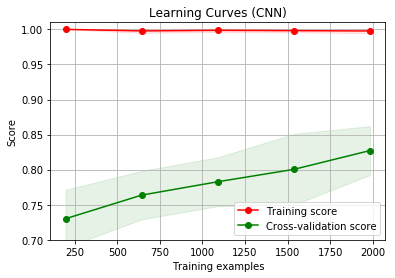

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose = 20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

train_datagen = ImageDataGenerator(
    rescale = 1./255,       # valores entre 0 y 1
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    'dataset/train', # ubicacion de imagenes
    target_size = (img_size, img_size), # tamaño de imagenes
    batch_size = 1568,
    class_mode = 'categorical'
).next()
test_set = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (img_size, img_size),
    batch_size = 637,
    class_mode = 'categorical'
).next()

X = np.concatenate((training_set[0], test_set[0]), axis=0)
y = np.concatenate((training_set[1], test_set[1]), axis=0)


title = "Learning Curves (CNN)"

estimator = KerasClassifier(build_fn = build_cnn, batch_size = 16, epochs = 20, verbose=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=1)

    
#     history = classifier.fit_generator(
#         training_set,
#         steps_per_epoch = steps,
#         epochs = 20,
#         validation_data = test_set,
#         validation_steps = 160,       # test_size / batch_size
#         workers = 10,                  # número de procesos
# #         callbacks = [checkpoint]
#     )

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
print(history.history['val_loss'][-1])
print(history.history['loss'][-1])

### Predicción

In [ ]:
import numpy as np
from keras.preprocessing import image

# load image with size 64x64
test_image = image.load_img('dataset/predict/poke.jpg', target_size = (img_size, img_size))
# add color chanel dimension
test_image = image.img_to_array(test_image)
# add another dimension for the batch
test_image = np.expand_dims(test_image, 0)
result = classifier.predict(test_image)
print(result)
print(training_set.class_indices)